<a href="https://colab.research.google.com/github/sagsshakya/Machine-Learning/blob/master/Machine%20Learning%20LAB/Q12_and_Q13_Rainfall_Prediction_using_Decision_Trees_%2B_Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 12. Rainfall Prediction using Decision Trees.
### Problem Statement:
    A weather prediction model that predicts if there’ll be rain or not  in a particular day with decision tree regression concept. 
### Context:

    This dataset is meant to complement the Austin Bikesharing Dataset.
### Content:
        Date (YYYY-MM-DD)
        TempHighF (High temperature, in Fahrenheit)
        TempAvgF (Average temperature, in Fahrenheit)
        TempLowF (Low temperature, in Fahrenheit)
        DewPointHighF (High dew point, in Fahrenheit)
        DewPointAvgF (Average dew point, in Fahrenheit)
        DewPointLowF (Low dew point, in Fahrenheit)
        HumidityHighPercent (High humidity, as a percentage)
        HumidityAvgPercent (Average humidity, as a percentage)
        HumidityLowPercent (Low humidity, as a percentage)
        SeaLevelPressureHighInches (High sea level pressure, in inches)
        SeaLevelPressureAvgInches (Average sea level pressure, in inches)
        SeaLevelPressureLowInches (Low sea level pressure, in inches)
        VisibilityHighMiles (High visibility, in miles)
        VisibilityAvgMiles (Average visibility, in miles)
        VisibilityLowMiles (Low visibility, in miles)
        WindHighMPH (High wind speed, in miles per hour)
        WindAvgMPH (Average wind speed, in miles per hour)
        WindGustMPH (Highest wind speed gust, in miles per hour)
        PrecipitationSumInches (Total precipitation, in inches) ('T' if Trace)
        Events (Adverse weather events. ' ' if None)

This dataset contains data for every date from 2013-12-21 to 2017-07-31.

# Importing necessary libraries.

In [5]:
import numpy as np
import pandas as pd

In [6]:
# uploading the csv file.
from google.colab import files
uploaded = files.upload()

Saving austin_weather.csv to austin_weather.csv


In [7]:
df = pd.read_csv('austin_weather.csv')

In [9]:
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,


# Data Cleaning.

In [13]:
# Drop or delete the unnecessary columns in the data.
df.drop(['Events', 'Date', 'SeaLevelPressureHighInches', 'SeaLevelPressureLowInches'], inplace = True, axis = 1) 

In [14]:
# Some values have 'T' which denotes trace rainfall (insignificant to be measured)
# we need to replace all occurrences of T with 0 
df = df.replace('T', 0.0) 

# the data also contains '-' which indicates no  
# or NIL. This means that data is not available 
df = df.replace('-', 0.0) 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   TempHighF                  1319 non-null   int64 
 1   TempAvgF                   1319 non-null   int64 
 2   TempLowF                   1319 non-null   int64 
 3   DewPointHighF              1319 non-null   object
 4   DewPointAvgF               1319 non-null   object
 5   DewPointLowF               1319 non-null   object
 6   HumidityHighPercent        1319 non-null   object
 7   HumidityAvgPercent         1319 non-null   object
 8   HumidityLowPercent         1319 non-null   object
 9   SeaLevelPressureAvgInches  1319 non-null   object
 10  VisibilityHighMiles        1319 non-null   object
 11  VisibilityAvgMiles         1319 non-null   object
 12  VisibilityLowMiles         1319 non-null   object
 13  WindHighMPH                1319 non-null   object
 14  WindAvgM

In [17]:
# Changing the datatype to float.
cols = df.columns.values[3:]
for COL in cols:
    df[COL] = df[COL].astype(np.float32)

In [29]:
# Transforming Y variable into a binary valued value.
# 0: for NO RAIN.
# 1: for RAIN.

def transformer(var):
    if var == 0.0:
        return 0
    else:
        return 1

# Applying the transformation.
df['target'] = df['PrecipitationSumInches'].apply(transformer)

In [30]:
df['target'].value_counts()

0    994
1    325
Name: target, dtype: int64

In [33]:
# Sampling the majority class for compensating the class imbalance.
sampled_0 = df[df['target'] == 0].sample(n = 350, random_state = 100)
all_1 = df[df['target'] == 1]

# Concatenating these datasets.
df_new = pd.concat([sampled_0, all_1], ignore_index = True)

In [35]:
df_new.shape

(675, 18)

In [36]:
# Separating the independent and target features.
X = df_new.drop(['PrecipitationSumInches', 'target'], axis = 1)
Y = df_new['target']

In [38]:
# Train - Test split.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state = 100)

# Model training using Decision Tree.

In [76]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(min_samples_split = 5,
                                    max_features = 8,
                                    max_leaf_nodes = 8,
                                    max_depth = 3,
                                    random_state = 100)
classifier.fit(x_train, y_train)

y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

In [77]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
def classification_performance(y_pred_train, y_pred_test,
                               y_train = y_train, y_test = y_test):
    
    print('Training Set: ')
    print('Accuracy Score = ', round(accuracy_score(y_train, y_pred_train), 2) )
    print('F1 - Score = ', round(f1_score(y_train, y_pred_train), 2) )
    print('ROC AUC Score = ', round(roc_auc_score(y_train, y_pred_train), 2) )
    print()
    print('Testing Set: ')
    print('Accuracy Score = ', round(accuracy_score(y_test, y_pred_test), 2) )
    print('F1 - Score = ', round(f1_score(y_test, y_pred_test), 2) )
    print('ROC AUC Score = ', round(roc_auc_score(y_test, y_pred_test), 2) )

    return

In [78]:
classification_performance(y_pred_train, y_pred_test)

Training Set: 
Accuracy Score =  0.88
F1 - Score =  0.88
ROC AUC Score =  0.88

Testing Set: 
Accuracy Score =  0.85
F1 - Score =  0.84
ROC AUC Score =  0.85


# 13. Confusion Matrix.
### Problem Statement:
    A Python script to create a confusion matrix on a predicted model. 

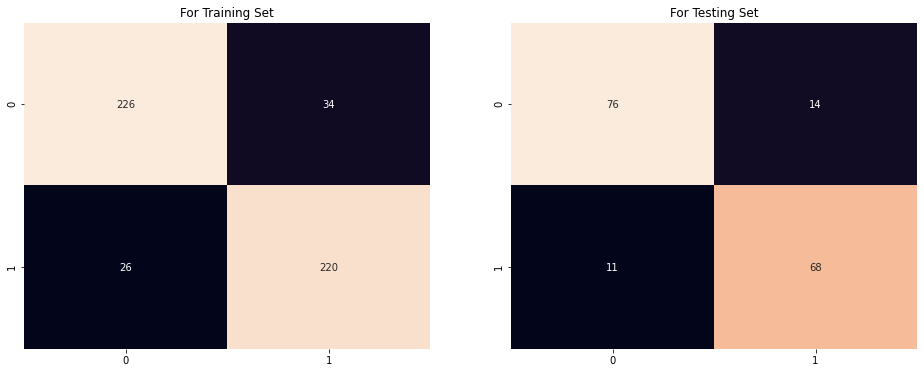

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot = True, fmt='0.0f', cbar=False)
plt.title('For Training Set')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot = True, cbar = False)
plt.title('For Testing Set')

plt.show()